Problem statement:
To determine if there is significant difference in mobile operator preferences between individuals 
residing in Tamil Nadu (TN) and those residing outside Tamil Nadu (Outside TN).

Null Hypothesis (H₀):
There is no significant difference in mobile operator preferences between 
users from Tamil Nadu and users from outside Tamil Nadu.  
H₀: P(TN) = P(Outside TN)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('FoDS _DATASET.csv')
contingency_table = pd.crosstab(data['Location'], data['Mobile Operator'])

In [3]:
chi_test, p_value, dof, expected = chi2_contingency(contingency_table)
print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi_test)
print("p-value:", p_value)

Contingency Table:
Mobile Operator  AIRTEL  BSNL  JIO  VI
Location                              
Outside TN           16     1   20   0
TN                   10     0    9   1

Chi-square statistic: 2.729658040002868
p-value: 0.43521072720512943


Chi - Square Method

In [4]:
chi_statistic = chi_test
degrees_of_freedom = dof
alpha = 0.05  # Assuming a 5% significance level 
critical_value = stats.chi2.ppf(1 - alpha, df=degrees_of_freedom)
print(f"Chi-squared test statistic: {chi_statistic}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Critical value at alpha={alpha}: {critical_value}")
if chi_statistic > critical_value:
    print("Reject the null hypothesis (statistically significant)")
    print("There is a significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.")
else:
    print("Fail to reject the null hypothesis (not statistically significant)")
    print("There is no significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.")

Chi-squared test statistic: 2.729658040002868
Degrees of freedom: 3
Critical value at alpha=0.05: 7.814727903251179
Fail to reject the null hypothesis (not statistically significant)
There is no significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.


P value Method

In [5]:
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.")


Fail to reject the null hypothesis.
There is no significant difference in mobile operator preferences between users from Tamil Nadu and users from outside Tamil Nadu.


In [6]:
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

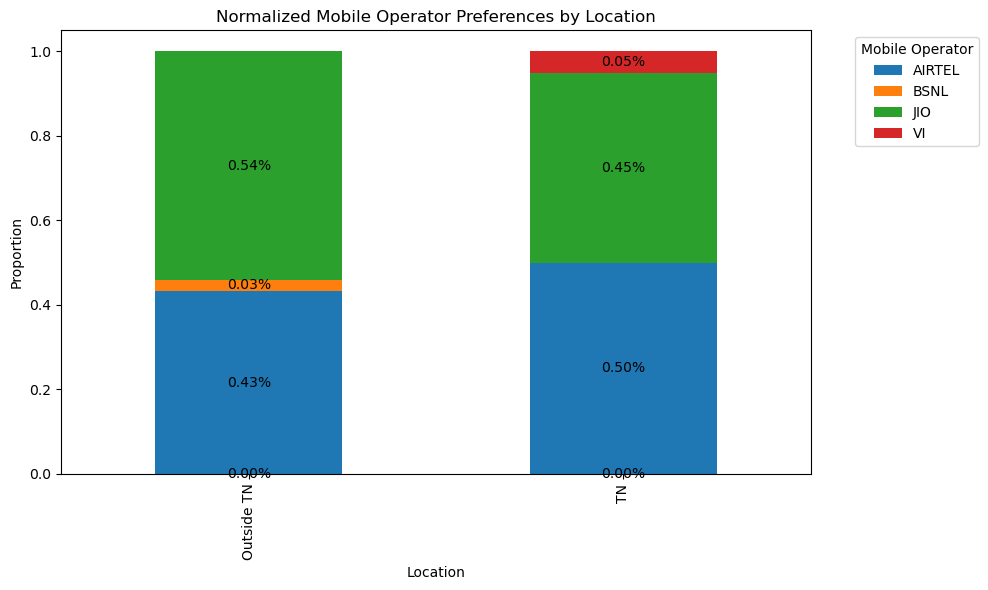

In [7]:
ax = normalized_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Mobile Operator Preferences by Location')
plt.xlabel('Location')
plt.ylabel('Proportion')
plt.legend(title='Mobile Operator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center')
plt.show()